All the instructions are provided for R. I am going to reproduce them in Python as best as I can.

# Preface

From the textbook, p. 54:

> This exercise relates to the `College` data set, which can be found in
the file `College.csv` . It contains a number of variables for 777 different universities and colleges in the US. Before reading the data into R , it can be viewed in Excel or a text
editor. The variables are
* `Private`: Public/private indicator
* `Apps`: Number of applications received
* `Accept`: Number of applicants accepted
* `Enroll`: Number of new students enrolled
* `Top10perc`: New students from top 10 % of high school class
* `Top25perc`: New students from top 25 % of high school class
* `F.Undergrad`: Number of full-time undergraduates
* `P.Undergrad`: Number of part-time undergraduates
* `Outstate`: Out-of-state tuition
* `Room.Board`: Room and board costs
* `Books`: Estimated book costs
* `Personal`: Estimated personal spending
* `PhD`: Percent of faculty with Ph.D.’s
* `Terminal`: Percent of faculty with terminal degree
* `S.F.Ratio`: Student/faculty ratio
* `perc.alumni`: Percent of alumni who donate
* `Expend`: Instructional expenditure per student
* `Grad.Rate`: Graduation rate

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


%matplotlib inline
sns.set()

# (a)

From the textbook, p. 54:

> Use the `read.csv()` function to read the data into R. Call the loaded data `college`. Make sure that you have the directory set to the correct location for the data.

In [ ]:
college = pd.read_csv('https://www.statlearning.com/s/College.csv')

# (b)

From the textbook, pp. 54-55:

> Look at the data using the `fix()` function. You should notice
that the first column is just the name of each university. We don’t
really want R to treat this as data. However, it may be handy to
have these names for later. Try the following commands:
```
> rownames ( college ) = college [ ,1]
> fix ( college )
```

In [ ]:
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Instead of `row.names` column, there is `Unnamed: 0` column. I'll rename it:

In [ ]:
college = college.rename(columns={'Unnamed: 0' : 'row.names'})

From the textbook, p. 55:
> You should see that there is now a `row.names` column with the
name of each university recorded. This means that R has given
each row a name corresponding to the appropriate university. R
will not try to perform calculations on the row names. However,
we still need to eliminate the first column in the data where the
names are stored. Try
```
> college = college [ , -1]
> fix ( college )
```
Now you should see that the first data column is `Private` . Note
that another column labeled `row.names` now appears before the
`Private` column. However, this is not a data column but rather
the name that R is giving to each row.

They've converted `row.names` to index. Doing the same:

In [ ]:
college = college.set_index('row.names')
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
row.names,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


# (c)

## c.1

From the textbook, p. 55:
> 1. Use the `summary()` function to produce a numerical summary
of the variables in the data set.

In [ ]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## c.2

From the textbook, p. 55:
> 2. Use the `pairs()` function to produce a scatterplot matrix of
the first ten columns or variables of the data. Recall that
you can reference the first ten columns of a matrix A using
`A[,1:10]` .

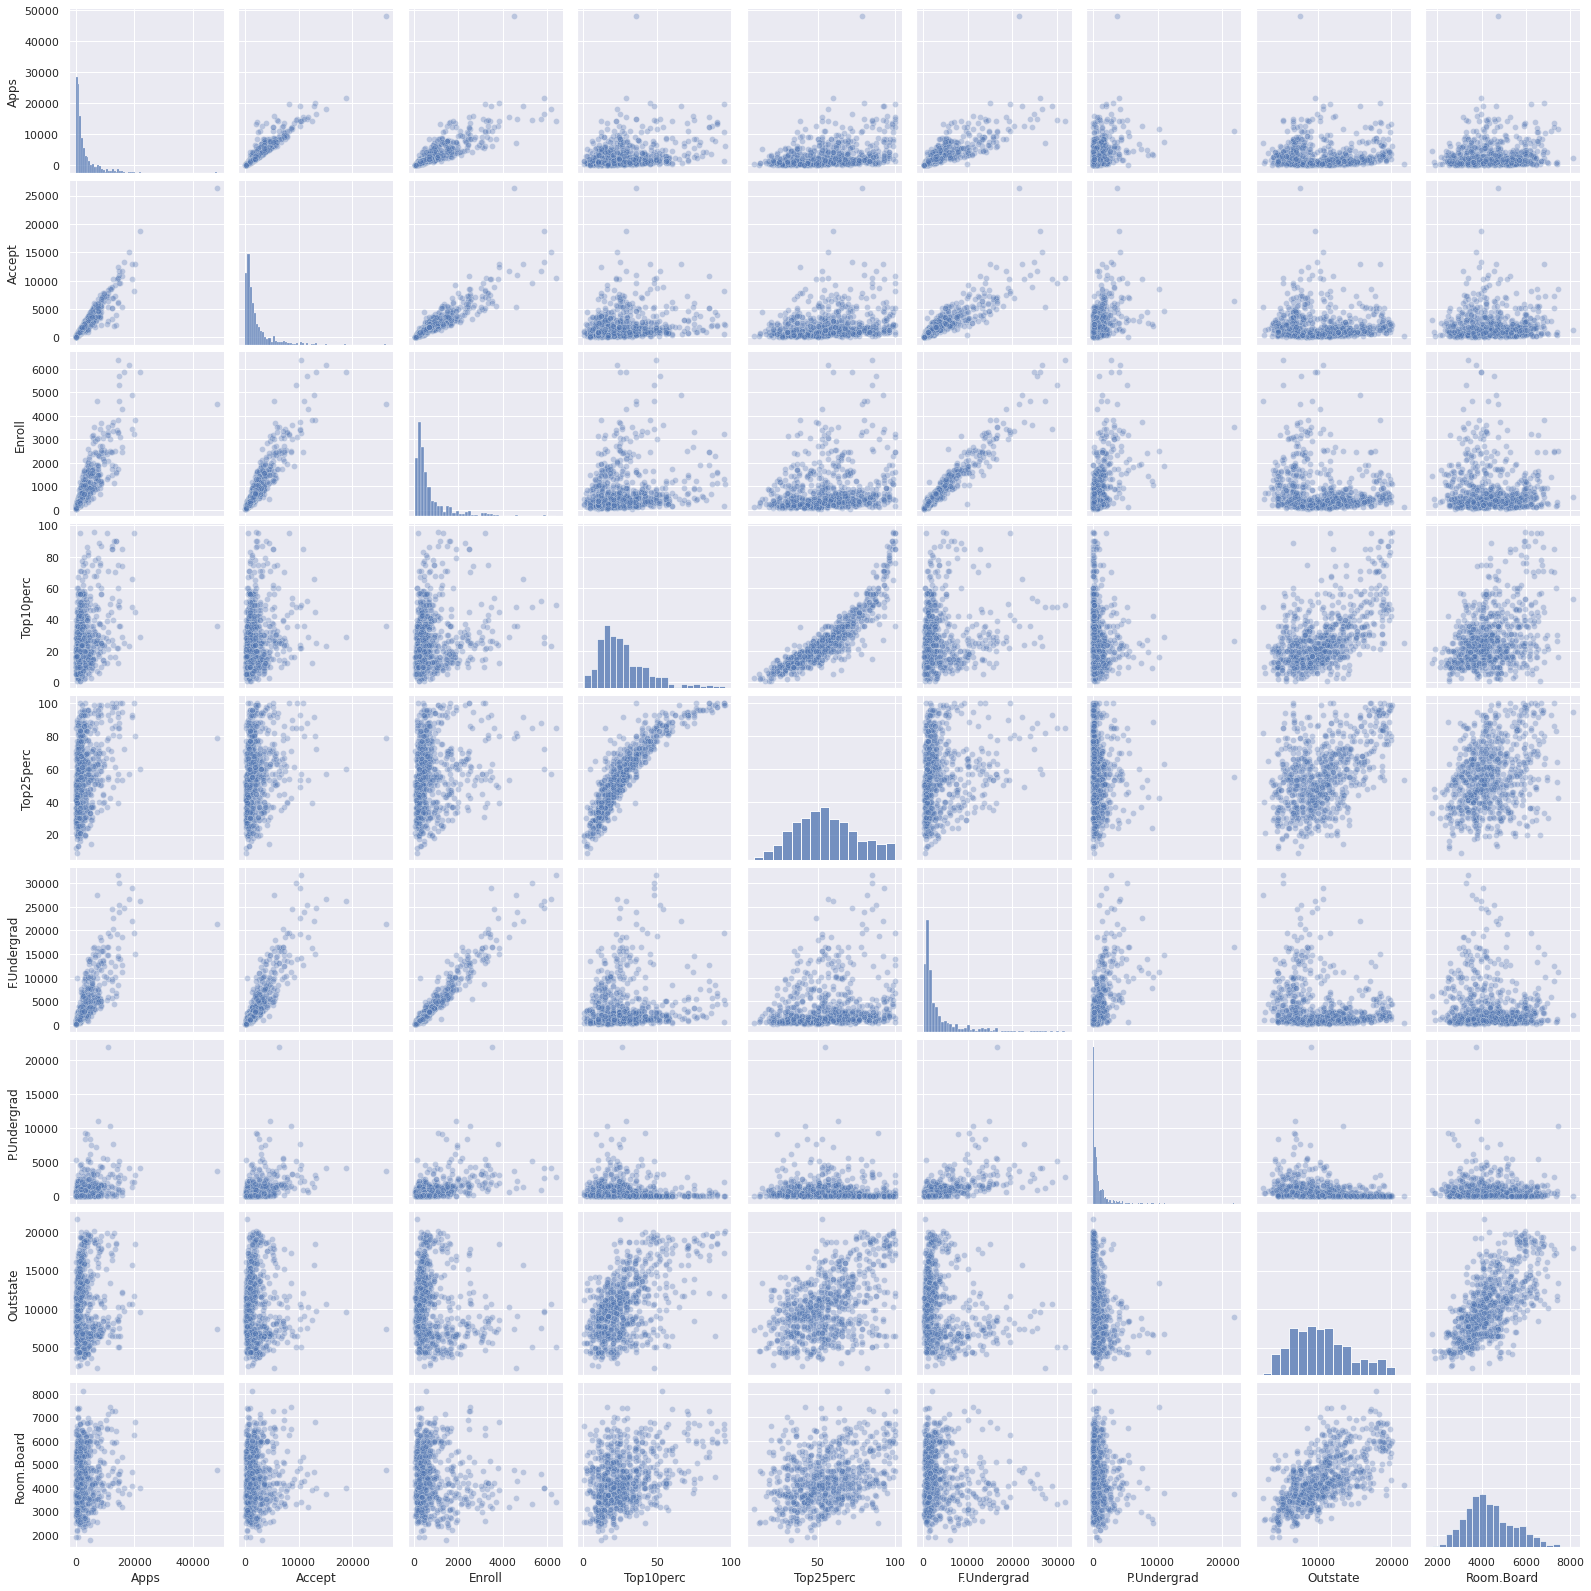

In [ ]:
sns.pairplot(
    college.iloc[:, :10]
    , plot_kws={'alpha' : 0.3}
)
plt.show()

## c.3

From the textbook, p. 55:
> 3. Use the `plot()` function to produce side-by-side boxplots of
`Outstate` versus `Private`.

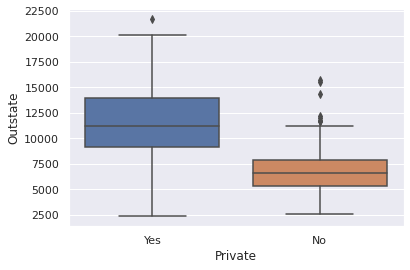

In [ ]:
sns.boxplot(x='Private', y='Outstate', data=college)
plt.show()

## c.4

From the textbook, p. 55:
> 4. Create a new qualitative variable, called `Elite`, by binning
the `Top10perc` variable. We are going to divide universities
into two groups based on whether or not the proportion
of students coming from the top 10% of their high school
classes exceeds 50%.
```
> Elite = rep("No", nrow(college))
> Elite[college$Top10perc > 50] = "Yes"
> Elite = as.factor(Elite)
> college = data.frame(college, Elite)
```
Use the `summary()` function to see how many elite universities there are. Now use the `plot()` function to produce side-by-side boxplots of `Outstate` versus `Elite`.

In [ ]:
college['Elite'] = 'No'
college.loc[college['Top10perc'] > 50, 'Elite'] = 'Yes'
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
row.names,,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,No
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,No
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,No
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Yes
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,No


## c.5

From the textbook, p. 55:
> 5. Use the `hist()` function to produce some histograms with
differing numbers of bins for a few of the quantitative variables. You may find the command `par(mfrow=c(2,2))` useful:
it will divide the print window into four regions so that four
plots can be made simultaneously. Modifying the arguments
to this function will divide the screen in other ways.

All the histograms are present on the pairplot above, but sure.

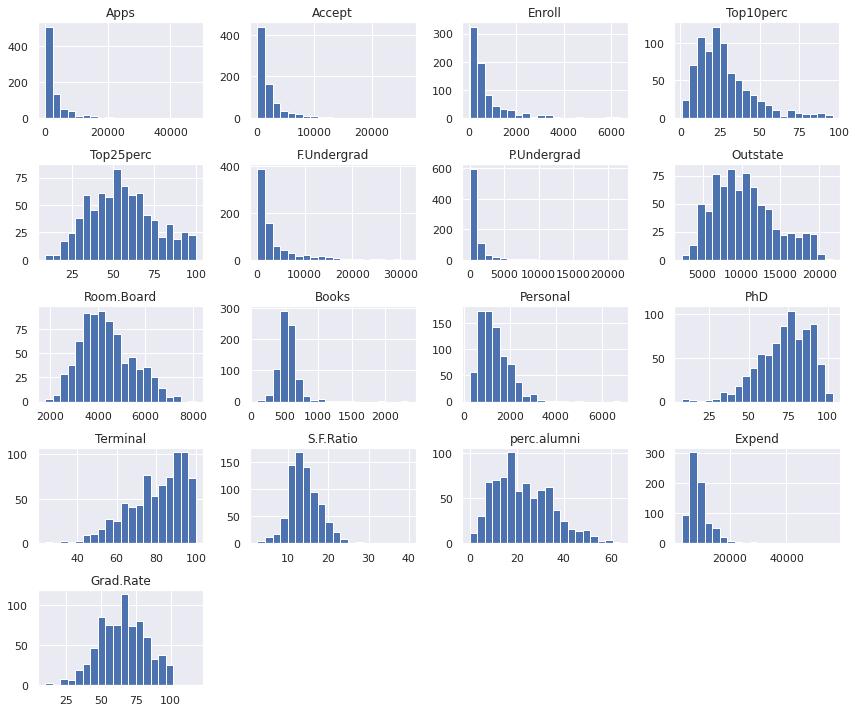

In [ ]:
college.hist(figsize=(12, 10)
             , bins=20
            )
plt.tight_layout()
plt.show()

## c.6

From the textbook, p. 55:
> 6. Continue exploring the data, and provide a brief summary
of what you discover.

Let's see which attributes are correlated.

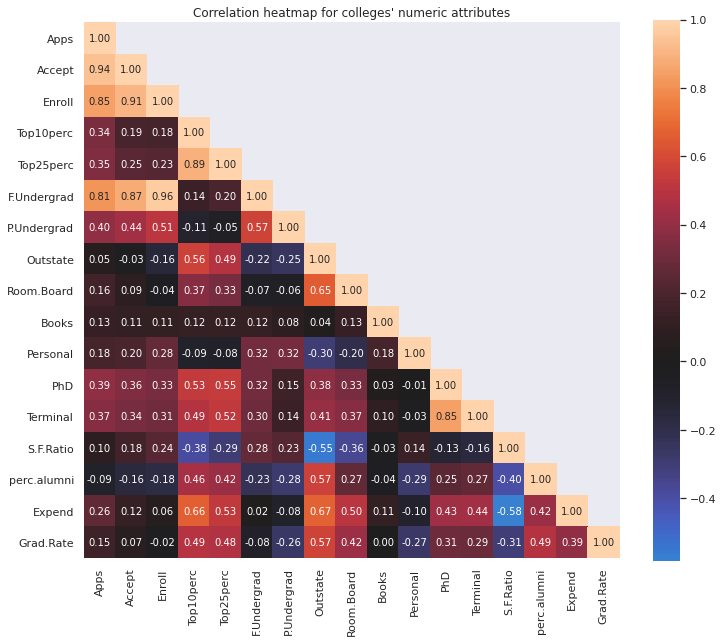

In [ ]:
mask = np.triu(np.ones_like(college.corr().values), 1)
plt.figure(figsize=(12, 12))
sns.heatmap(college.corr()
            , mask=mask
            , square=True
            , annot=True
            , fmt='.2f'
            , cmap=sns.color_palette('icefire', as_cmap=True)
            , center=0.0
            , cbar_kws={'shrink' : 0.83}
           )
plt.title('Correlation heatmap for colleges\' numeric attributes')
plt.show()

There are a number of highly correlated variables.
1. `Apps`, `Accept`, `Enroll`, `F.Undergrad` &mdash; all variables seem to depend on the size of student population of the university.
1. `Top10perc` - `Top25perc` &mdash; the more people from top 10% of their class enrolled, the more people from top 25% of their class enrolled. These are correlated, because a) 10% are included into 25%, b) because 10-percenters and 25-percenters are enrolling to the same places.
1. `Outstate` - `Room.Board` &mdash; room and board cost included in out-of-state tuition costs? Or both costs are location-dependent?
1. `Terminal` - `PhD` &mdash; maybe, PhD is often the terminal degree?
1. The strongest negative correlation is between `Expend` and `S.F.Ratio`. The higher instructional expenditure per student is, the lower student/faculty ratio. Some elite academic facilities?